In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
class SimpleCNN:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
		# first CONV => RELU => BN layer set
		model.add(Conv2D(32, (3, 3), strides=(2, 2), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		# second CONV => RELU => BN layer set
		model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(128))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		# return the constructed network architecture
		return model

In [ ]:
# import the necessary packages
from tensorflow.keras.losses import MSE
import tensorflow as tf
def generate_image_adversary(model, image, label, eps=2 / 255.0):
	# cast the image
	image = tf.cast(image, tf.float32)
	# record our gradients
	with tf.GradientTape() as tape:
		# explicitly indicate that our image should be tacked for
		# gradient updates
		tape.watch(image)
		# use our model to make predictions on the input image and
		# then compute the loss
		pred = model(image)
		loss = MSE(label, pred)
	# calculate the gradients of loss with respect to the image, then
	# compute the sign of the gradient
	gradient = tape.gradient(loss, image)
	signedGrad = tf.sign(gradient)
	# construct the image adversary
	adversary = (image + (signedGrad * eps)).numpy()
	# return the image adversary to the calling function
	return adversary

In [ ]:
import numpy as np
def generate_adversarial_batch(model, total, images, labels, dims,
	eps=0.01):
	# unpack the image dimensions into convenience variables
	(h, w, c) = dims
	# we're constructing a data generator here so we need to loop
	# indefinitely
	while True:
		# initialize our perturbed images and labels
		perturbImages = []
		perturbLabels = []
		# randomly sample indexes (without replacement) from the
		# input data
		idxs = np.random.choice(range(0, len(images)), size=total,
			replace=False)
  # loop over the indexes
		for i in idxs:
			# grab the current image and label
			image = images[i]
			label = labels[i]
			# generate an adversarial image
			adversary = generate_image_adversary(model,
				image.reshape(1, h, w, c), label, eps=eps)
			# update our perturbed images and labels lists
			perturbImages.append(adversary.reshape(h, w, c))
			perturbLabels.append(label)
		# yield the perturbed images and labels
		yield (np.array(perturbImages), np.array(perturbLabels))

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:22<00:00, 45.8MB/s]
100% 2.06G/2.06G [00:22<00:00, 98.4MB/s]


In [ ]:
!unzip /content/chest-xray-covid19-pneumonia.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  infl

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
import os
import pandas as pd
y = 0
data = []
for dirname, _, filenames in os.walk('../content/Data/train/PNEUMONIA'):
    for filename in filenames:
        y = y + 1
        if y<=2847:
            data.append(os.path.join(dirname, filename))

In [ ]:
data

['../content/Data/train/PNEUMONIA/PNEUMONIA(660).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(2698).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(2774).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(2680).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(1453).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(307).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(460).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(3096).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(1454).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(2820).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(2597).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(144).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(1098).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(2904).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(718).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(449).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(329).jpg',
 '../content/Data/train/PNEUMONIA/PNEUMONIA(1817).jpg',

In [ ]:
import pathlib
import tensorflow as tf

data_dir = '/content/Data/train'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, image_size=(180, 180), batch_size=16
)

print(type(dataset))

Found 5144 files belonging to 3 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
for data, labels in dataset.take(1):
    print(data.shape)
    print(labels.shape)

(16, 180, 180, 3)
(16,)


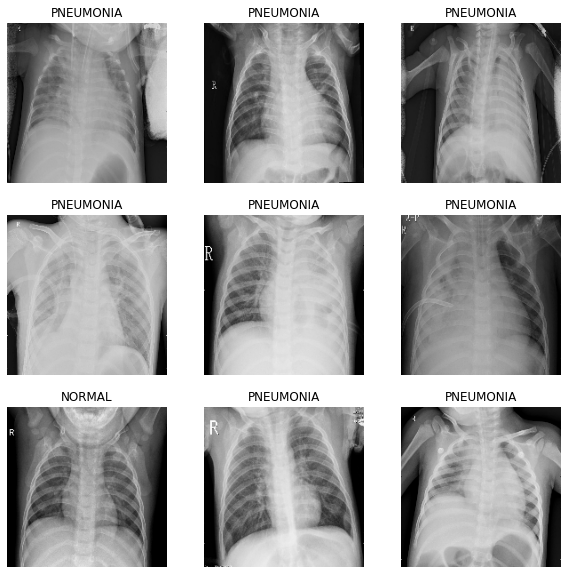

In [ ]:
import matplotlib.pyplot as plt
 
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
dataset

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
data

<tf.Tensor: shape=(16, 180, 180, 3), dtype=float32, numpy=
array([[[[ 16.166666 ,  16.166666 ,  16.166666 ],
         [ 19.89     ,  19.89     ,  19.89     ],
         [ 23.172222 ,  23.172222 ,  23.172222 ],
         ...,
         [ 18.3165   ,  18.3165   ,  18.3165   ],
         [ 15.090178 ,  15.090178 ,  15.090178 ],
         [ 11.766724 ,  11.766724 ,  11.766724 ]],

        [[ 15.666666 ,  15.666666 ,  15.666666 ],
         [ 21.630001 ,  21.630001 ,  21.630001 ],
         [ 24.699999 ,  24.699999 ,  24.699999 ],
         ...,
         [ 19.100147 ,  19.100147 ,  19.100147 ],
         [ 17.35996  ,  17.35996  ,  17.35996  ],
         [ 10.666723 ,  10.666723 ,  10.666723 ]],

        [[ 12.7277775,  12.7277775,  12.7277775],
         [ 15.383334 ,  15.383334 ,  15.383334 ],
         [ 20.638891 ,  20.638891 ,  20.638891 ],
         ...,
         [ 19.888998 ,  19.888998 ,  19.888998 ],
         [ 15.       ,  15.       ,  15.       ],
         [ 12.572327 ,  12.572327 ,  12.57232

In [ ]:
labels

<tf.Tensor: shape=(16,), dtype=int32, numpy=array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1], dtype=int32)>

In [ ]:
# load MNIST dataset and scale the pixel values to the range [0, 1]
print("[INFO] loading Covid19 dataset...")
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y= train_test_split(data,labels, test_size=0.2,random_state=42)
trainX = trainX / 255.0
testX = testX / 255.0
# add a channel dimension to the images
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
# one-hot encode our labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

[INFO] loading Covid19 dataset...


TypeError: ignored

In [ ]:
# initialize our optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=1e-3)
model = SimpleCNN.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the simple CNN on MNIST
print("[INFO] training network...")
model.fit(trainX, trainY,
	validation_data=(testX, testY),
	batch_size=64,
	epochs=20,
	verbose=1)

[INFO] compiling model...
[INFO] training network...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
828/938 [=========================>....] - ETA: 3s - loss: 0.2152 - accuracy: 0.9355

KeyboardInterrupt: ignored

In [ ]:
# make predictions on the testing set for the model trained on
# non-adversarial images
(loss, acc) = model.evaluate(x=testX, y=testY, verbose=0)
print("[INFO] normal testing images:")
print("[INFO] loss: {:.4f}, acc: {:.4f}\n".format(loss, acc))
# generate a set of adversarial from our test set
print("[INFO] generating adversarial examples with FGSM...\n")
(advX, advY) = next(generate_adversarial_batch(model, len(testX),
	testX, testY, (28, 28, 1), eps=0.1))
# re-evaluate the model on the adversarial images
(loss, acc) = model.evaluate(x=advX, y=advY, verbose=0)
print("[INFO] adversarial testing images:")
print("[INFO] loss: {:.4f}, acc: {:.4f}\n".format(loss, acc))

[INFO] normal testing images:
[INFO] loss: 0.0755, acc: 0.9747

[INFO] generating adversarial examples with FGSM...

[INFO] adversarial testing images:
[INFO] loss: 5.0790, acc: 0.0672



In [ ]:
# lower the learning rate and re-compile the model (such that we can
# fine-tune it on the adversarial images)
print("[INFO] re-compiling model...")
opt = Adam(lr=1e-4)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# fine-tune our CNN on the adversarial images
print("[INFO] fine-tuning network on adversarial examples...")
model.fit(advX, advY,
	batch_size=64,
	epochs=10,
	verbose=1)

[INFO] re-compiling model...
[INFO] fine-tuning network on adversarial examples...
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


157/157 [==============================] - 6s 31ms/step - loss: 1.4494 - accuracy: 0.6728
Epoch 2/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1970 - accuracy: 0.9418
Epoch 3/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0685 - accuracy: 0.9811
Epoch 4/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0392 - accuracy: 0.9900
Epoch 5/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0252 - accuracy: 0.9949
Epoch 6/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0179 - accuracy: 0.9964
Epoch 7/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0147 - accuracy: 0.9974
Epoch 8/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0118 - accuracy: 0.9979
Epoch 9/10
157/157 [==============================] - 5s 30ms/step - loss: 0.0096 - accuracy: 0.9983
Epoch 10/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0089 - accuracy: 0.9986


In [ ]:
# now that our model is fine-tuned we should evaluate it on the test
# set (i.e., non-adversarial) again to see if performance has degraded
(loss, acc) = model.evaluate(x=testX, y=testY, verbose=0)
print("")
print("[INFO] normal testing images *after* fine-tuning:")
print("[INFO] loss: {:.4f}, acc: {:.4f}\n".format(loss, acc))
# do a final evaluation of the model on the adversarial images
(loss, acc) = model.evaluate(x=advX, y=advY, verbose=0)
print("[INFO] adversarial images *after* fine-tuning:")
print("[INFO] loss: {:.4f}, acc: {:.4f}".format(loss, acc))


[INFO] normal testing images *after* fine-tuning:
[INFO] loss: 0.0652, acc: 0.9802

[INFO] adversarial images *after* fine-tuning:
[INFO] loss: 0.0034, acc: 0.9996
